# Graph Matching and Vertex Nomination

You work at Facebook and Twitter (wow, both), but there’s been a terrible incident. All twitter users’ names and handles have been somehow been deleted! Your bosses are furious (understandably) and have tasked you with somehow recovering the lost information. How might you go about doing this? Luckily, you’ve been working hard and have somehow earned yourself this dual Facebook/Twitter gig, so you have a great resource at your disposal: the Facebook social network. You know all facebook users and who they are friends with, and since you’ve only lost the twitter usernames, you can still figure out which ghost-users follow each other. You decide to use the Facebook network connectivity data to re-label the twitter social network. Alternatively, you can say the we are “aligning” Twitter based on Facebook. Obviously this isn’t ideal, but you’re making the best out of a bad situation.

In the example above, the social networks are represented with each user as a node, and an edge exists if two users are friends. We'll define the facebook and twitter networks as $F$ and $T$ respectively, with associated adjacency matrices $A_F$ and $A_T$. This method is known as $\textit{Graph Matching}$, because we are matching the node labels of one graph to another. This can also be thought of as a mapping; that is based on the neighborhood structure of a node in the $F$, we assign the same label to the node $T$ with the most similar structure. In other words, one of our twitter users will be assigned the user name of the Facebook user with the most common followers. This is then done for the whole network, such that overall the structure is best preserved.

As you can imagine, there must be a very large number of these possible mappings. In fact, for network pairs with $n$ nodes, there are $n!$ possible mappings. So how would go about solving this mathematically? First, we need a metric that tells us how similar two networks are to each other. For graph matching, this similarity metric is defined as $f(A, B) = ||A - B||_F^2$ for unweighted adjacency matrices $A, B \in \mathbb{R}^{n \times n}$, where $||.||_F^2$ is the Frobenius norm. To understand this functionally, consider the best possible case where $A=B$, ie the maximally similar. The difference will be a matrix of all zeros, and taking the squared norm will then yield $f(A,B) = 0$. If we then remove one edge from $A$, then $f(A,B) = 1$. If we consider the worst possible case (every edge in $A$ does not exist in $B$, and vice versa), then $f(A,B) = n^2$. This metric effectively counts the number of adjacnecy disagreements between $A$ and $B$. Thus, we want to find the mapping where $f(A, B)$ is as small as possible.


## A Simple Network

Say we have the network pairs below, $G$ and $H$. There are four nodes total, numbered 0 through 3. As we can see they are very simple, and they are clearly equal to each other. 

![gm_1](gm_1.png)

However, the spatial layout of a network's nodes is arbirary, and in reality it can often be much harder to tell whether two networks are the same. Below, we swap the spatial location of nodes 2 and 3 in network $H$. Even with such as a small network, it's hard to tell whether the networks are the same. Nonetheless, by looking at the adjacency matrices, we see that the networks are in fact the same, with $f(A, B) = 0$

![gm_2](gm_2.png)

Next, we swap the actual the node labels of nodes 2 and 3 in network $H$. 

![gm_3](gm_3.png)

As we see the networks are no longer the same, with $f(A,B) = 8$. This might seem a bit high, but note that due to the graph being undirected, adjecency disagreements are effectively counted twice.

## Permutation Matrices

Mappings are represented via $\textit{Permutation Matrices}$ when solving the graph matching problem. Due to the one-to-one nature of these matchings, they are also known as $\textit{bijections}$. A permutation matrix is a matrix of all ones and zeros, where each row and column adds up to one. In other words, each row and column has exactly one entry equal to one, with the rest being zeros.

Permutation matrices are commonly used as a method to move around the rows and columns of a square matrix. Consider the following example:


In [3]:
import numpy as np

B = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12],
              [13,14,15,16]])

P = np.array([[0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
              [1,0,0,0]])
print('original matrix B') 
print(B)

print('row permutation:') 
print(P@B)

print('column permutation:')
print(B@P.T)

original matrix B
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
row permutation:
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [ 1  2  3  4]]
column permutation:
[[ 2  3  4  1]
 [ 6  7  8  5]
 [10 11 12  9]
 [14 15 16 13]]


The permutation matrix represents the following bijection:  
$0 \rightarrow 3$  
$1 \rightarrow 0$  
$2 \rightarrow 1$   
$3 \rightarrow 2$  
The matrix multiplication $PB$ moves the rows based on the bijection, and $BP^T$ moves the columns based on the bijection. Therefore by combined these two operations $PBP^T$, we can move both the rows and columns based on a single bijection.

Next, we again consider the previous simple network pair example of swapping the node labels of 2 and 3 in network H:
![gm_3](gm_3.png)

This swap is represented by the following bijection to recover the node correspondence between $G$ and $H$  
$0 \rightarrow 0$  
$1 \rightarrow 1$  
$2 \rightarrow 3$   
$3 \rightarrow 2$  


In [8]:
B = np.array([[0,1,0,1],
              [1,0,1,0],
              [0,1,0,1],
              [1,0,1,0]])

P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]])
print('original matrix B') 
print(B)

print('row and column permutation:') 
print(P@B@P.T)


original matrix B
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
row and column permutation:
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


As shown in the code block above, using the permutation matrix we are able to recover the correspondence between $G$ and $H$.  
Thus, the graph matching formulation for any two adjacency matrices $A, B$, seeks to minimize $|| A - PBP^\intercal||_F^2$ such that $P$ is a permuation matrix. In mathematics, the process of minimizing (or maximizing) a function based on some constraint is known as optimization.

## Gradient Descent

Gradient Descent is a very common optimization method using to find optimal solutions for a wide range of problems. The algorithm used for solving graph matching is a variation of gradient.  The specifics of the algorithm are beyond the scope of this book, but for now you can simply imagine it as gradient descent.  

A simple way to think of the method is gravity.  Consider an inspector who might use a golf ball to find the lowest point when installing a drain. The ball rolls down hill until it comes to a stop; once stopped, we know we've found the lowest point. Gradient descent works in a similar way, taking steps in the direction of the local gradient with respect to some paramter. Once the gradient is zero, the minimum has been found.

The main steps of a gradient descent method are choosing a suitable initial position (can be chosen randomly), then gradually improving the cost function one step at a time, until the function is changing by a very small amount, converging to a minimum. 

![grad_desc](grad_desc.png)

The image above is a simplification in two dimensions; the network functions we optimize over are n dimensional when matching networks with n nodes, making the problem incredibly difficult to solve. For this reason (among others outside of the scope), the state-of-the-art graph matching algorithm is an approximation algorithm.


## Graph Matching with graspologic

For the example below, we will match two networks with a known to be have a node bijection that preserves a common network structure. To do this, we simulate a single Erdos-Reyni network, $A$, with 50 nodes and edge probability of 30. Then, we generate $B$ by randomly permuting the node labels of $A$. Thus, $A$ and $B$ are said to be $\textit{isomorphic}$.

Number of adjecnecy disagreements:  1012.0


<AxesSubplot:title={'center':'B [A Randomly Shuffled]'}>

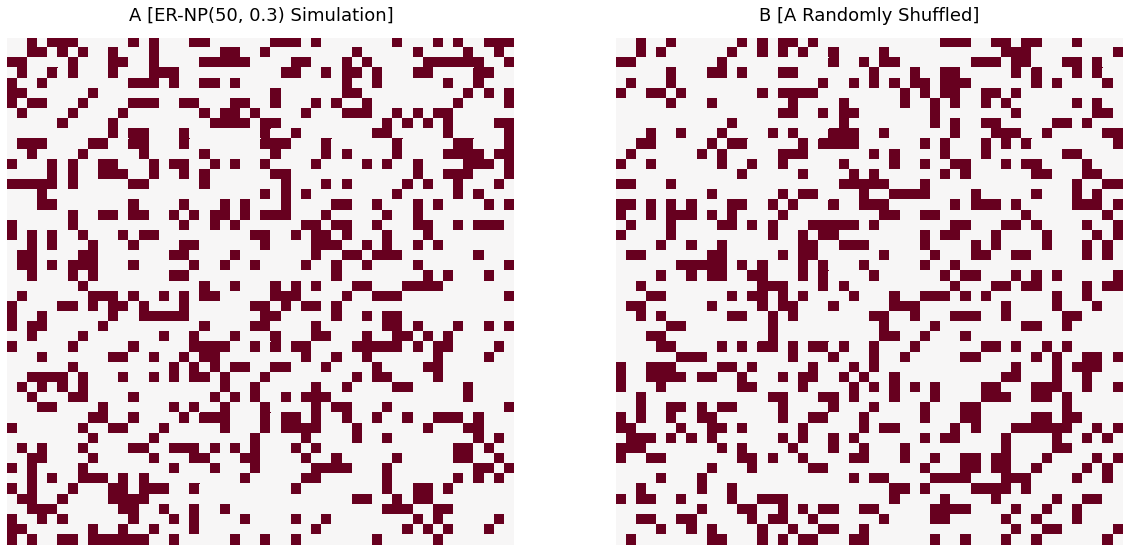

In [4]:
from graspologic.simulations import er_np
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
n = 50
p = 0.3

np.random.seed(1)
A = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)
B = A[np.ix_(node_shuffle_input, node_shuffle_input)]
print("Number of adjecnecy disagreements: ", np.sum(abs(A-B)))

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
heatmap(A, ax=axs[0], cbar=False, title = 'A [ER-NP(50, 0.3) Simulation]')
heatmap(B, ax=axs[1], cbar=False, title = 'B [A Randomly Shuffled]')

Below, we create a model to solve GMP. The model is then fitted for the two graphs A and B.

Number of adjecnecy disagreements:  0.0


<AxesSubplot:title={'center':'B [Unshuffled]'}>

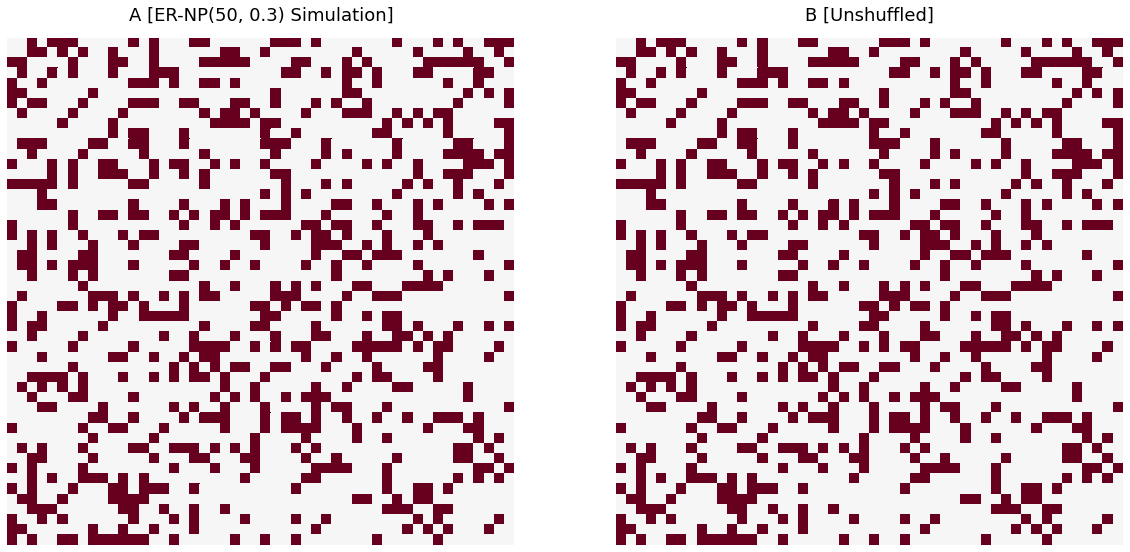

In [5]:
from graspologic.match import GraphMatch
gmp = GraphMatch()
gmp = gmp.fit(A,B)
B = B[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]
print("Number of adjecnecy disagreements: ", np.sum(abs(A-B)))

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
heatmap(A, ax=axs[0], cbar=False, title = 'A [ER-NP(50, 0.3) Simulation]')
heatmap(B, ax=axs[1], cbar=False, title = 'B [Unshuffled]')

The graph matching algorithm is able to successfully unshuffle $B$, with zero adjacency disagreements between $A$ and the matched $B$.

## Seeds